In [48]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.widgets import Slider
from pylab import plot, show, figure, scatter, axes, draw
import networkx as nx
df = pd.read_csv("damage_dealt.csv")
df4 = pd.read_csv("kills.csv")
df.head()

,Unnamed: 0,victim_recording_id,attacker_recording_id,type_id,timestamp,victim_pos_x,victim_pos_y,victim_pos_z,victim_rot_x,victim_rot_y,...,attacker_pos_z,attacker_rot_x,attacker_rot_y,attacker_rot_z,weapon_id,hitbone_id,damage_flags,recording_id,session_id,timestamp.1
0,0,3443200,3451366,9,1510687883136,-16335.975586,-122326.679688,-1515.285034,0.767571,-0.638972,...,-207.621414,0.410203,0.883687,-0.225458,1719842945,-1,NaN,3451366,37549105,1510687505016
1,1,3443224,3447681,9,1510687499756,-16652.804688,-78191.242188,-5249.766113,0.805523,0.545975,...,-5151.328613,-0.321143,0.946453,0.033070,-748308999,-1,NaN,3447681,37549105,1510687028945
2,2,3443224,3443257,9,1510687166055,-16622.425781,-77757.125000,-5265.432617,-0.212527,0.975253,...,-1662.564575,0.868812,-0.413878,-0.271791,-748308999,-1,NaN,3443257,37549105,1510686502645
3,3,3443224,3447681,9,1510687552916,-16677.115234,-78277.484375,-5229.097656,0.933654,-0.318198,...,-5194.935547,-0.625700,0.779947,0.013518,-748308999,-1,NaN,3447681,37549105,1510687028945
4,4,3446094,3446206,9,1510687097250,17867.931641,-115967.539062,-5118.886230,-0.856150,-0.492731,...,-4570.242188,0.850335,0.450956,-0.271238,1581610878,0,NaN,3446206,37549105,1510686865313


In [124]:
df4.head()

,Unnamed: 0,killer_recording_id,victim_recording_id,timestamp,recording_id,session_id,timestamp.1
0,0,3449687,3443142,1510688133632,3449687,37549105,1510687281295
1,1,3463042,3443144,1510689278868,3463042,37549105,1510688922757
2,2,3448659,3443145,1510687337946,3448659,37549105,1510687147078
3,3,3443257,3443146,1510687547831,3443257,37549105,1510686502645
4,4,3443195,3443177,1510686720106,3443195,37549105,1510686496939


In [188]:
result = df4.sort_values(['timestamp'])
print(result.head())
for g, df in result.groupby(np.arange(len(result)) // 100):
    print(df.shape)

    Unnamed: 0  killer_recording_id  victim_recording_id      timestamp  \
29          29              3443186              3443229  1510686626273   
40          40              3443199              3443304  1510686669579   
4            4              3443195              3443177  1510686720106   
37          37              3443199              3443279  1510686734379   
18          18              3443279              3443199  1510686734582   

    recording_id  session_id    timestamp.1  
29       3443186    37549105  1510686496939  
40       3443199    37549105  1510686497554  
4        3443195    37549105  1510686496939  
37       3443199    37549105  1510686497554  
18       3443279    37549105  1510686504290  
(100, 7)
(100, 7)
(100, 7)
(100, 7)
(23, 7)


In [59]:
df6 = df4[df4['recording_id'] == 3443200]
df6.head()

,Unnamed: 0,killer_recording_id,victim_recording_id,timestamp,recording_id,session_id,timestamp.1
16,16,3443200,3443195,1510687026336,3443200,37549105,1510686497787
27,27,3443200,3443227,1510686779368,3443200,37549105,1510686497787
32,32,3443200,3443274,1510686780557,3443200,37549105,1510686497787
48,48,3443200,3443734,1510687201445,3443200,37549105,1510686497787
49,49,3443200,3444473,1510687237496,3443200,37549105,1510686497787


In [10]:
df.dtypes

Unnamed: 0                 int64
victim_recording_id        int64
attacker_recording_id      int64
type_id                    int64
timestamp                  int64
victim_pos_x             float64
victim_pos_y             float64
victim_pos_z             float64
victim_rot_x             float64
victim_rot_y             float64
victim_rot_z             float64
attacker_pos_x           float64
attacker_pos_y           float64
attacker_pos_z           float64
attacker_rot_x           float64
attacker_rot_y           float64
attacker_rot_z           float64
weapon_id                  int64
hitbone_id                 int64
damage_flags             float64
recording_id               int64
session_id                 int64
timestamp.1                int64
dtype: object

In [19]:
# creating the correlation table
df2 = df[['victim_recording_id','attacker_recording_id','timestamp','victim_pos_x','victim_pos_y','attacker_pos_x','attacker_pos_y']]
correlations = df2.corr()
print(correlations)

                       victim_recording_id  attacker_recording_id  timestamp  \
victim_recording_id               1.000000               0.716122   0.877864   
attacker_recording_id             0.716122               1.000000   0.828591   
timestamp                         0.877864               0.828591   1.000000   
victim_pos_x                     -0.251393              -0.245413  -0.298213   
victim_pos_y                      0.296920               0.267897   0.312000   
attacker_pos_x                   -0.235153              -0.256891  -0.276562   
attacker_pos_y                    0.239853               0.252601   0.263828   

                       victim_pos_x  victim_pos_y  attacker_pos_x  \
victim_recording_id       -0.251393      0.296920       -0.235153   
attacker_recording_id     -0.245413      0.267897       -0.256891   
timestamp                 -0.298213      0.312000       -0.276562   
victim_pos_x               1.000000     -0.637790        0.921117   
victim_pos_y  

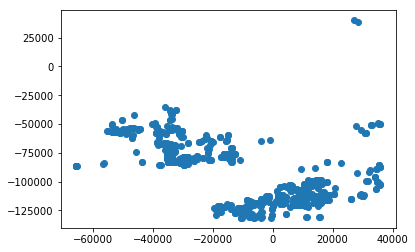

In [21]:
plt.show()
plt.scatter(df[['victim_pos_x']],df[['victim_pos_y']])
plt.scatter(df[['attacker_pos_x']],df[['attacker_pos_y']])

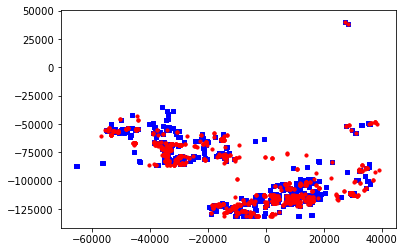

In [29]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(df[['victim_pos_x']], df[['victim_pos_y']], s=10, c='b', marker="s", label='first')
ax1.scatter(df[['attacker_pos_x']],df[['attacker_pos_y']], s=10, c='r', marker="o", label='second')

plt.show()

   victim_recording_id  attacker_recording_id      timestamp  victim_pos_x  \
1              3443224                3447681  1510687499756 -16652.804688   
2              3443224                3443257  1510687166055 -16622.425781   
3              3443224                3447681  1510687552916 -16677.115234   

   victim_pos_y  attacker_pos_x  attacker_pos_y  
1 -78191.242188   -14382.384766   -84659.218750  
2 -77757.125000   -33137.644531   -70893.750000  
3 -78277.484375   -13906.255859   -81829.703125  


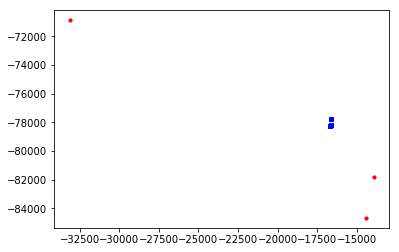

In [32]:
df3 = df2[df2['victim_recording_id'] == 3443224]
print(df3)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(df3[['victim_pos_x']], df3[['victim_pos_y']], s=10, c='b', marker="s", label='first')
ax1.scatter(df3[['attacker_pos_x']],df3[['attacker_pos_y']], s=10, c='r', marker="o", label='second')

plt.show()

In [62]:
df5 = pd.crosstab(df4.victim_recording_id, df4.killer_recording_id)
idx = df5.columns.union(df5.index)
adjacency_matrix = df5.reindex(index = idx, columns=idx, fill_value=0)
print (adjacency_matrix)

         3443142  3443144  3443145  3443146  3443177  3443179  3443180  \
3443142        0        0        0        0        0        0        0   
3443144        0        0        0        0        0        0        0   
3443145        0        0        0        0        0        0        0   
3443146        0        0        0        0        0        0        0   
3443177        0        0        0        0        0        0        0   
3443179        0        0        0        0        0        0        0   
3443180        0        0        0        0        0        0        0   
3443181        0        0        0        0        0        0        0   
3443182        0        0        0        0        0        0        0   
3443183        0        0        0        0        0        0        0   
3443184        0        0        0        0        0        0        0   
3443186        0        0        0        0        0        0        0   
3443187        0        0        0    

C:\Users\kette\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\kette\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\kette\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\kette\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

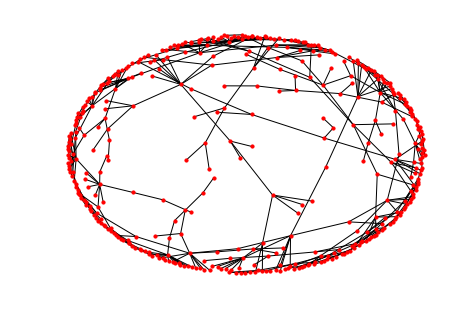

In [63]:
def show_graph_with_labels(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=10)
    plt.show()

show_graph_with_labels(adjacency_matrix)

In [208]:
df7 = result[:10]
G = nx.from_pandas_dataframe(df7,source='killer_recording_id',target='victim_recording_id',edge_attr=['recording_id','session_id','timestamp'],create_using=nx.DiGraph())

C:\Users\kette\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\kette\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\kette\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\kette\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

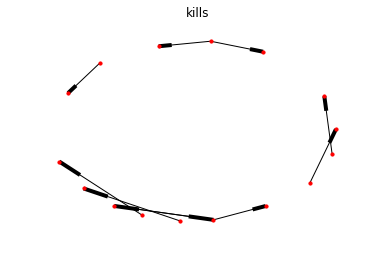

In [215]:
def visualize_network(network, figure_title):
    """
    visualizing it with NetworkX and saving the figure into .pdf file.

    Parameters
    ----------
    network: a networkx Graph object
    figure_fname: full or relative path (including file name) where to save the figure
    figure_title: title of the figure

    """
    fig = plt.figure()
    ax = fig.add_subplot(111)
    pos=nx.spring_layout(network)
    nx.draw(network,node_size=10)
    ax.set_title(figure_title)
    
    return network

plt.show()
visualize_network(G,'kills')

C:\Users\kette\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\kette\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\kette\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\kette\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

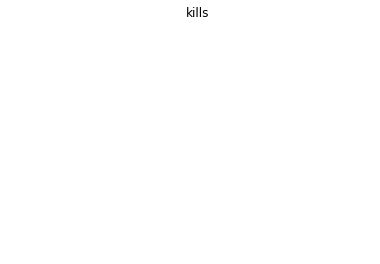

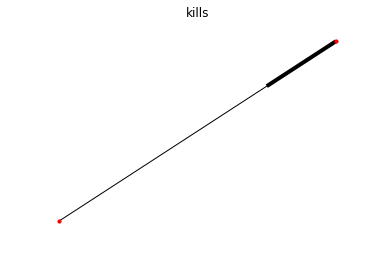

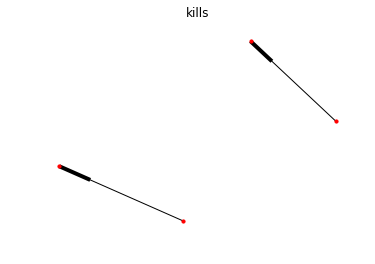

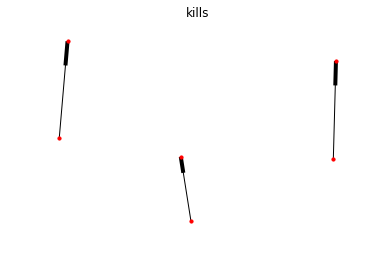

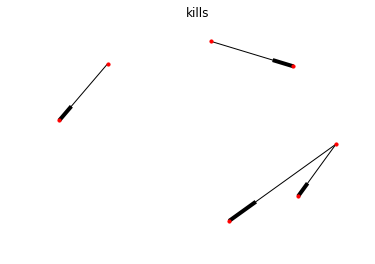

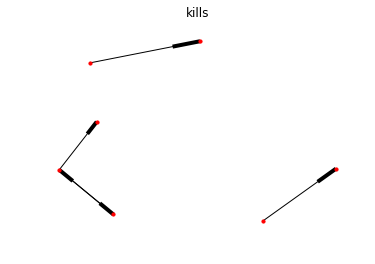

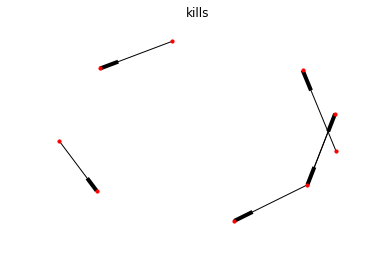

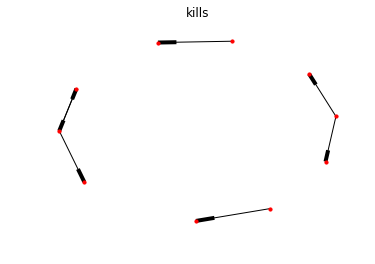

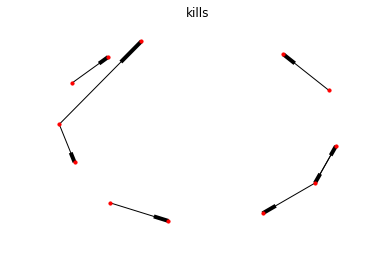

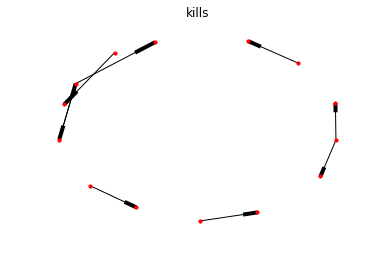

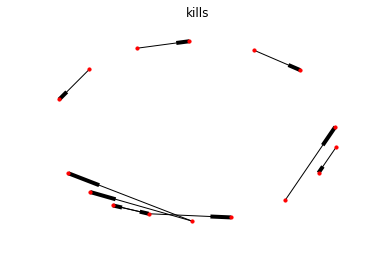

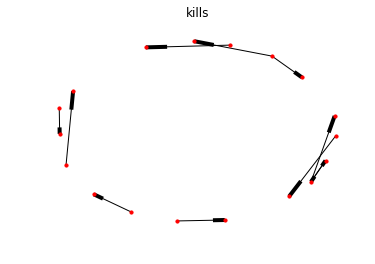

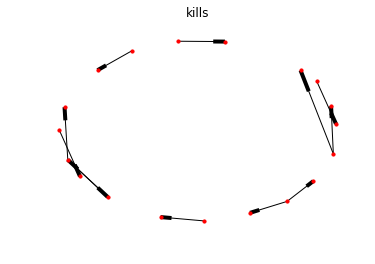

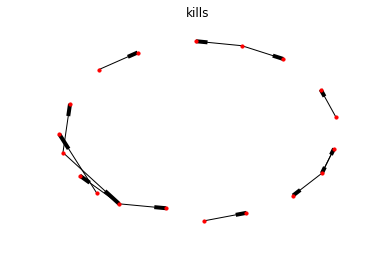

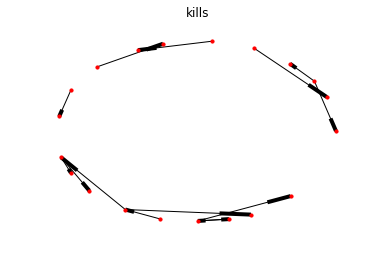

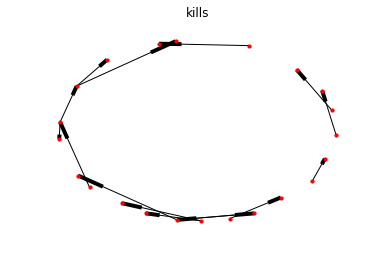

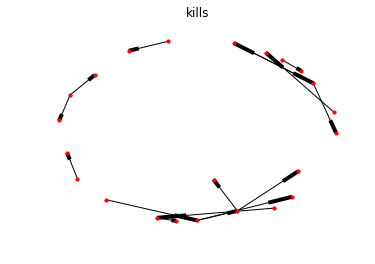

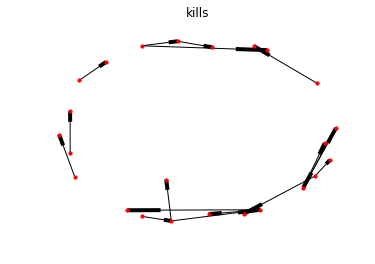

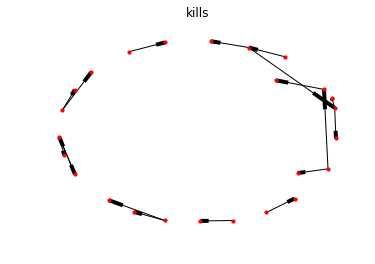

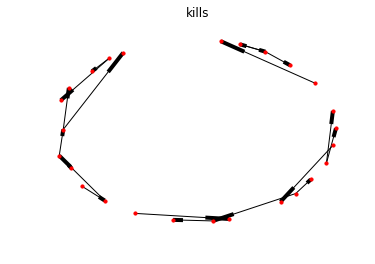

In [220]:
for i in range(20):
    df7 = result[:i]
    G = nx.from_pandas_dataframe(df7,source='killer_recording_id',target='victim_recording_id',edge_attr=['recording_id','session_id','timestamp'],create_using=nx.DiGraph())
    plt.show()
    visualize_network(G,'kills')

In [162]:
def get_x_and_y_degrees(network):
    """
    For the given network, creates two arrays (x_degrees
    and y_degrees) of the degrees of "start" and "end" nodes of each edge in
    the network. For undirected networks, each edge is considered twice.

    Parameters
    ----------
    network: a NetworkX graph object

    Returns
    -------
    x_degrees: np.array
    y_degrees: np.array
    """
    edges = network.edges()
    n_edges = len(edges)
    #print(n_edges)
    #x_degrees = np.zeros(2 * n_edges)
    #y_degrees = np.zeros(2 * n_edges)
    #print(x_degrees)
    #print(y_degrees)
    x_degrees=[]
    y_degrees=[]
    for edge in edges:
        #print(edge)
        #print(network.degree(edge[0]),",",(network.degree(edge[1])))
        x_degrees.append(network.degree(edge[0]))
        y_degrees.append(network.degree(edge[1]))
        x_degrees.append(network.degree(edge[1]))
        y_degrees.append(network.degree(edge[0]))
    return x_degrees, y_degrees

In [160]:
get_x_and_y_degrees(G)[0]

[3,
 1,
 3,
 1,
 2,
 1,
 2,
 9,
 10,
 2,
 10,
 1,
 10,
 1,
 10,
 1,
 10,
 3,
 10,
 2,
 10,
 2,
 10,
 1,
 10,
 1,
 2,
 1,
 2,
 1,
 3,
 1,
 3,
 2,
 3,
 1,
 3,
 1,
 8,
 2,
 8,
 2,
 8,
 1,
 8,
 2,
 8,
 1,
 8,
 1,
 8,
 1,
 2,
 4,
 3,
 2,
 3,
 1,
 2,
 1,
 7,
 1,
 7,
 2,
 7,
 2,
 7,
 1,
 7,
 1,
 7,
 1,
 9,
 1,
 9,
 1,
 9,
 1,
 9,
 8,
 9,
 3,
 9,
 2,
 9,
 1,
 9,
 1,
 7,
 1,
 7,
 1,
 7,
 7,
 7,
 1,
 7,
 1,
 7,
 1,
 3,
 1,
 3,
 3,
 4,
 3,
 4,
 1,
 4,
 1,
 11,
 3,
 11,
 1,
 11,
 1,
 11,
 1,
 11,
 1,
 11,
 2,
 11,
 2,
 11,
 2,
 11,
 1,
 11,
 1,
 2,
 3,
 3,
 2,
 3,
 1,
 3,
 11,
 3,
 1,
 8,
 1,
 8,
 1,
 8,
 1,
 8,
 1,
 8,
 1,
 8,
 2,
 8,
 1,
 4,
 3,
 4,
 2,
 4,
 4,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 6,
 3,
 6,
 2,
 6,
 1,
 6,
 1,
 6,
 1,
 3,
 1,
 3,
 1,
 3,
 2,
 3,
 1,
 3,
 1,
 3,
 1,
 4,
 1,
 4,
 1,
 4,
 4,
 2,
 1,
 7,
 4,
 7,
 1,
 7,
 2,
 7,
 1,
 7,
 1,
 7,
 1,
 4,
 1,
 4,
 1,
 4,
 1,
 13,
 1,
 13,
 1,
 13,
 1,
 13,
 1,
 13,
 1,
 13,
 1,
 13,
 2,
 13,
 1,
 13,
 1,
 13,
 1,
 13,
 1,
 13,
 1,
 2,
 1,


In [161]:
get_x_and_y_degrees(G)[1]

[3,
 1,
 3,
 1,
 2,
 1,
 2,
 9,
 10,
 2,
 10,
 1,
 10,
 1,
 10,
 1,
 10,
 3,
 10,
 2,
 10,
 2,
 10,
 1,
 10,
 1,
 2,
 1,
 2,
 1,
 3,
 1,
 3,
 2,
 3,
 1,
 3,
 1,
 8,
 2,
 8,
 2,
 8,
 1,
 8,
 2,
 8,
 1,
 8,
 1,
 8,
 1,
 2,
 4,
 3,
 2,
 3,
 1,
 2,
 1,
 7,
 1,
 7,
 2,
 7,
 2,
 7,
 1,
 7,
 1,
 7,
 1,
 9,
 1,
 9,
 1,
 9,
 1,
 9,
 8,
 9,
 3,
 9,
 2,
 9,
 1,
 9,
 1,
 7,
 1,
 7,
 1,
 7,
 7,
 7,
 1,
 7,
 1,
 7,
 1,
 3,
 1,
 3,
 3,
 4,
 3,
 4,
 1,
 4,
 1,
 11,
 3,
 11,
 1,
 11,
 1,
 11,
 1,
 11,
 1,
 11,
 2,
 11,
 2,
 11,
 2,
 11,
 1,
 11,
 1,
 2,
 3,
 3,
 2,
 3,
 1,
 3,
 11,
 3,
 1,
 8,
 1,
 8,
 1,
 8,
 1,
 8,
 1,
 8,
 1,
 8,
 2,
 8,
 1,
 4,
 3,
 4,
 2,
 4,
 4,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 6,
 3,
 6,
 2,
 6,
 1,
 6,
 1,
 6,
 1,
 3,
 1,
 3,
 1,
 3,
 2,
 3,
 1,
 3,
 1,
 3,
 1,
 4,
 1,
 4,
 1,
 4,
 4,
 2,
 1,
 7,
 4,
 7,
 1,
 7,
 2,
 7,
 1,
 7,
 1,
 7,
 1,
 4,
 1,
 4,
 1,
 4,
 1,
 13,
 1,
 13,
 1,
 13,
 1,
 13,
 1,
 13,
 1,
 13,
 1,
 13,
 2,
 13,
 1,
 13,
 1,
 13,
 1,
 13,
 1,
 13,
 1,
 2,
 1,


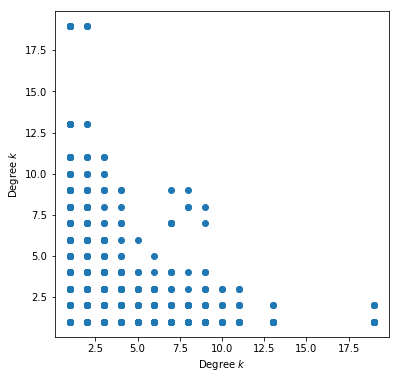

In [163]:
def create_scatter(x_degrees, y_degrees):
    """
    For x_degrees, y_degrees pair, creates and
    saves a scatter of the degrees.

    Parameters
    ----------
    x_degrees: np.array
    y_degrees: np.array
    network_name: str
        network name (string) for naming purposes
    network_title: str
        a network-referring title (string) for figures
    figure_base: str
        A base path for the heatmap figures. network_name and .pdf
        extension is added after the figure_base

    Returns
    -------
    no output, but scatter plot (as pdf) is saved into the given path
    """
    assert all(x_degrees) and all(y_degrees), "x_degrees and y_degrees are not properly defined"
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    ax.scatter(x_degrees,y_degrees)
    ax.set_xlabel(r'Degree $k$')
    ax.set_ylabel(r'Degree $k$')
    plt.show()

x_degrees = get_x_and_y_degrees(G)[0]
y_degrees = get_x_and_y_degrees(G)[1]
create_scatter(x_degrees,y_degrees)

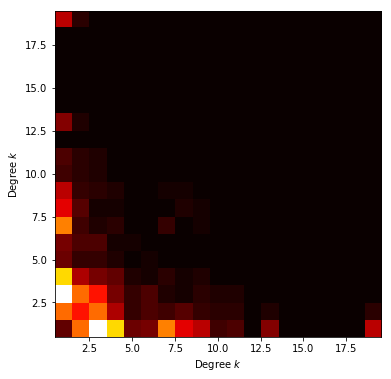

In [164]:
from scipy.stats import binned_statistic_2d
def create_heatmap(x_degrees, y_degrees):
    """
    For x_degrees, y_degrees pair, creates and
    saves a heatmap of the degrees.

    Parameters
    ----------
    x_degrees: np.array
    y_degrees: np.array
    network_name: str
        network name (string) for naming purposes
    network_title: str
        a network-referring title (string) for figures
    figure_base: str
        A base path for the heatmap figures. network_name and .pdf
        extension is added after the figure_base

    Returns
    -------
    no output, but heatmap figure (as pdf) is saved into the given path
    """
    assert all(x_degrees) and all(y_degrees), "x_degrees and y_degrees are not properly defined"
    k_min = np.min((x_degrees, y_degrees))
    k_max = np.max((x_degrees, y_degrees))

    n_bins = k_max-k_min+1
    values = np.zeros(len(x_degrees))

    statistic = binned_statistic_2d(x_degrees,y_degrees, values,
                                    statistic='count', bins=n_bins)[0]

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    ax.imshow(statistic, extent=(k_min-0.5,k_max+0.5,k_min-0.5,k_max+0.5),
              origin='lower', cmap='hot', interpolation='nearest')
    #ax.set_title(network_title)
    ax.set_xlabel(r'Degree $k$')
    ax.set_ylabel(r'Degree $k$')
    #add_colorbar(statistic, cmap='hot')
    

x_degrees = get_x_and_y_degrees(G)[0]
y_degrees = get_x_and_y_degrees(G)[1]
create_heatmap(x_degrees,y_degrees)

C:\Users\kette\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\kette\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\kette\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\kette\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

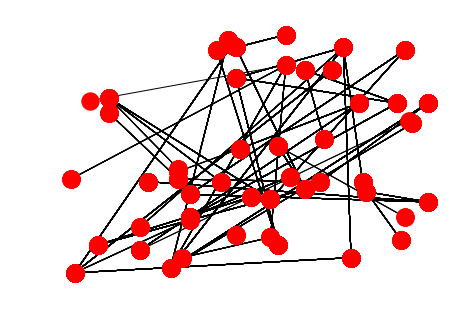

In [103]:
import random
import pylab
from matplotlib.pyplot import pause
import networkx as nx
pylab.ion()

graph = nx.Graph()
node_number = 0
graph.add_node(node_number, Position=(random.randrange(0, 100), random.randrange(0, 100)))

def get_fig():
    global node_number
    node_number += 1
    graph.add_node(node_number, Position=(random.randrange(0, 100), random.randrange(0, 100)))
    graph.add_edge(node_number, random.choice(graph.nodes()))
    nx.draw(graph, pos=nx.get_node_attributes(graph,'Position'))

num_plots = 50;
pylab.show()

for i in range(num_plots):

    get_fig()
    pylab.draw()
    pause(2)

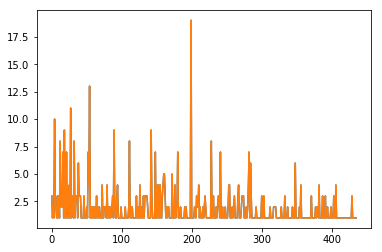

In [88]:
def get_degrees(network):
    """
    Returns the degree of each node of network.

    Parameters
    ----------
    network: a NetworkX graph object

    Returns
    -------
    degrees: list
        degrees of all network node
    """
    degrees = []
    
    for node in network:
        degree = network.degree(node)
        degrees.append(degree)
    return degrees

plt.plot(get_degrees(G))
plt.show()

In [81]:
def clustering_and_average_clustering(network):
    
    clustering_coefficients = [] # this is a list
   
    for node in network:
         n_neighbors = network.neighbors(node)
         if len(n_neighbors) > 1:
            n_links = 0
            for neighbor1 in n_neighbors:
                for neighbor2 in n_neighbors:
                    if network.has_edge(neighbor1,neighbor2):
                        n_links += 1
            n_links = float(n_links / 2)
            c = float(n_links / (0.5 * len(n_neighbors) * (len(n_neighbors) - 1)))
            clustering_coefficients.append(c)
         else:
             clustering_coefficients.append(0) 
    clustering_sum = float(sum(clustering_coefficients))
    average_clustering = (1 / float(network.number_of_nodes())) * clustering_sum # Replace this with a correct definition

    return (clustering_coefficients, average_clustering)

clustering_and_average_clustering(G)

0.0


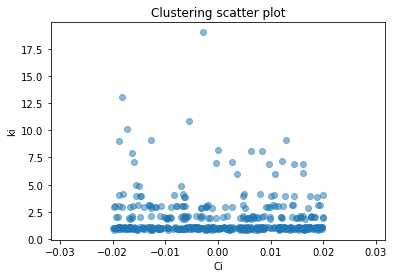

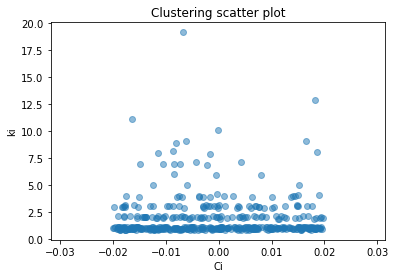

In [86]:
clustering, C_average_own = clustering_and_average_clustering(G)
degrees = get_degrees(G)
def create_degree_clustering_scatter(degrees, clustering,
                                     x_label, y_label):
    """
    Creates and saves a scatter plot of node clustering coefficient as a
    functionof node degree.

    Parameters
    ----------
    degrees : list
        list of node degrees
    clustering : list
        list of node clustering coefficients in the same order as degrees
    x_label : str
        label of the x axis of the figure
    y_label : label of the y axis of the figure
    figure_fname : full or relative path (including file name) where
                  to save the figure

    """

    # Insert clutter to avoid overlapping points
    n_nodes = len(degrees)
    # The values 0.15, and 0.02 do not contain any deeper meaning.
    clutter_degrees = np.random.uniform(-0.15, 0.15, size=n_nodes)
    clutter_clustering = np.random.uniform(-0.02, 0.02, size=n_nodes)
    degrees = degrees + clutter_degrees
    clustering = clustering + clutter_clustering

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.scatter(clustering, degrees, alpha=0.5)
    ax.set_title("Clustering scatter plot")
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    # Hint: Use plt.scatter and alpha=0.5 (makes the points semi-transparent)
    
create_degree_clustering_scatter(degrees,clustering,'Ci','ki')
plt.show()

In [5]:
stats = df.describe()
print(stats)

       Unnamed: 0  victim_recording_id  attacker_recording_id  type_id  \
count  1051.00000         1.051000e+03           1.051000e+03   1051.0   
mean    525.00000         3.456168e+06           3.455038e+06      9.0   
std     303.54187         8.998611e+03           8.200701e+03      0.0   
min       0.00000         3.443142e+06           3.443142e+06      9.0   
25%     262.50000         3.448659e+06           3.449084e+06      9.0   
50%     525.00000         3.455283e+06           3.454042e+06      9.0   
75%     787.50000         3.464522e+06           3.459153e+06      9.0   
max    1050.00000         3.474465e+06           3.474907e+06      9.0   

          timestamp  victim_pos_x   victim_pos_y  victim_pos_z  victim_rot_x  \
count  1.051000e+03   1051.000000    1051.000000   1051.000000   1051.000000   
mean   1.510689e+12  -6392.247219  -97289.453958  -3488.950999      0.039191   
std    1.028940e+06  22540.578552   24795.943155   1557.644548      0.696791   
min    1.5106